<h2><center>Week 2 - Assignment - Solutions</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the second lecture.

**Important**: You will need sounddevice, numpy, scipy and matplotlib. To install these, run *pip install sounddevice numpy scipy matplotlib* in the terminal, or *!pip install sounddevice numpy scipy matplotlib* in Jupyter. You will also need the data in the *data* folder.

The exercise will be marked as passed if you get **at least 10/15** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, March 7, 2024.**

<h3 style="text-align:left;">Exercise 1 - Audio signal<span style="float: right">5 points</span></h3>

In this exercise you'll work with continuous audio signals. First we load and plot the audio signals:

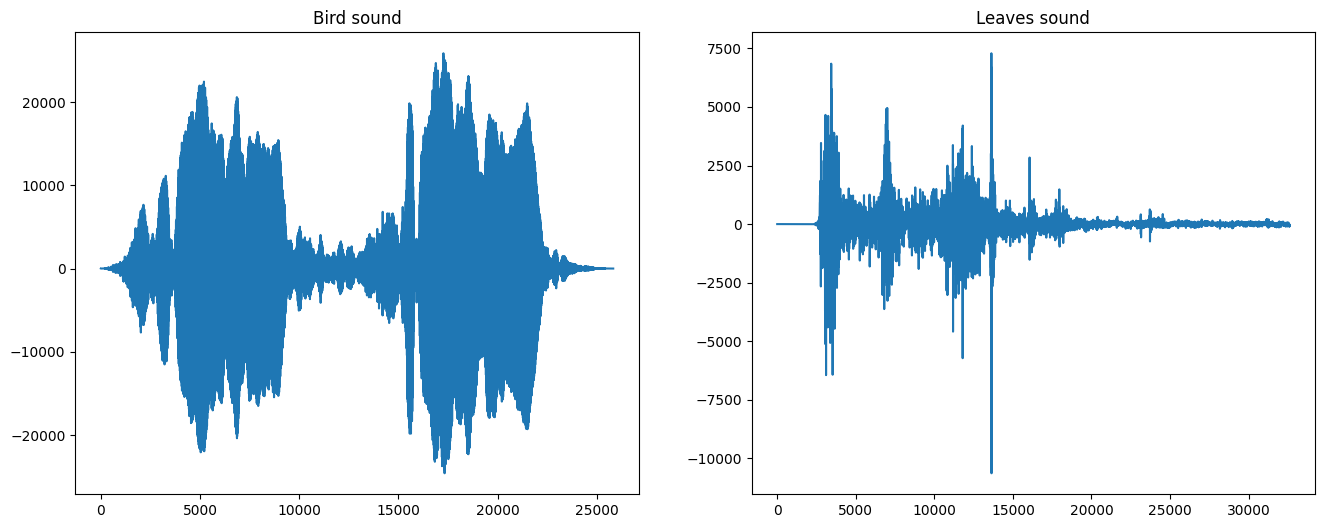

In [1]:
# Import dependencies
import time
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import read

fs_bird, sound_bird = read('./data/bird.wav')
fs_leaves, sound_leaves = read('./data/leaves.wav')

# Plot sounds in different subplots
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(sound_bird)
plt.title("Bird sound")
plt.subplot(1, 2, 2)
plt.plot(sound_leaves)
plt.title("Leaves sound")
plt.show()

# Play sounds
time.sleep(1)
sd.play(sound_bird, fs_bird)
time.sleep(1)
sd.play(sound_leaves, fs_leaves)
time.sleep(1)

Matplotlib, object-oriented way:

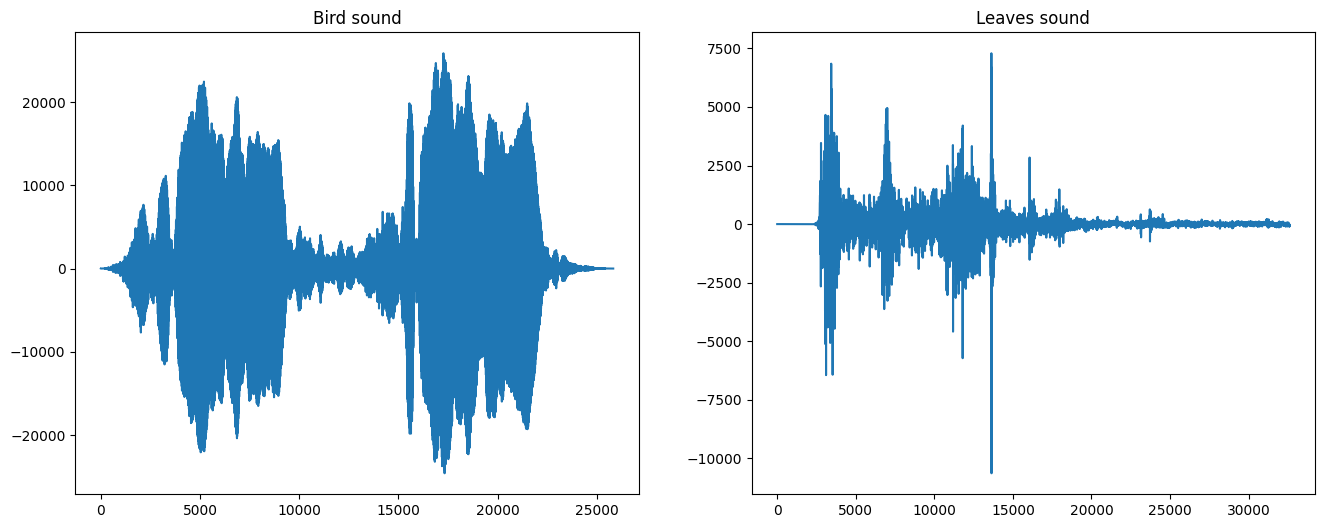

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))  # different function
axs[0].plot(sound_bird)
axs[0].set_title("Bird sound")  # different method
axs[1].plot(sound_leaves)
axs[1].set_title("Leaves sound")
plt.show()

1. Double the amplitude of the second audio signal (leaves) using *numpy*. Then plot the amplified signal using *matplotlib*. (*1 point*)

In [3]:
import numpy as np

sound_leaves_amp = np.multiply(sound_leaves, 2)  
# how else ?

In [4]:

# sound_leaves * 2

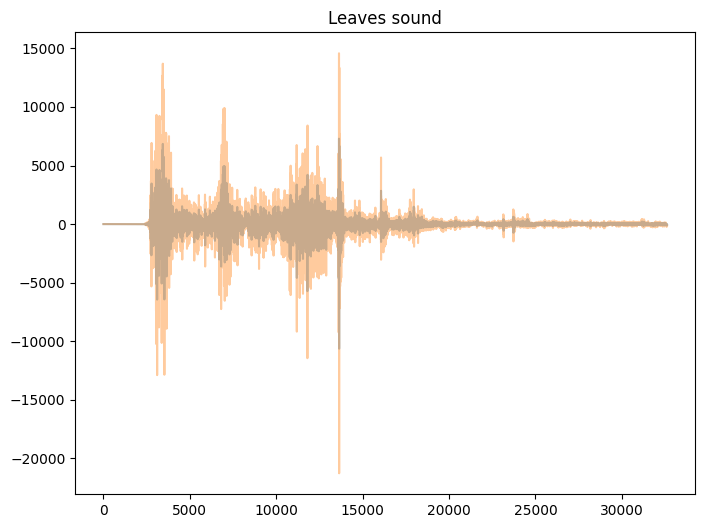

In [5]:
plt.figure(figsize=(8,6))
plt.plot(sound_leaves, alpha=0.4, label="original")
plt.plot(sound_leaves_amp, alpha=0.4, label="amplified")
plt.title("Leaves sound")
plt.show()

2. The two sounds don't have the same length (number of samples). Print the length of the two sounds and create a new leaves sound as long as the birds sound. Print again the lenghts to make sure they match. (Use the amplified leaves sound previously created). (*1 point*)

In [6]:
print("Before cutting:")
print(sound_bird.shape)
print(sound_leaves_amp.shape)

N_samples_birds = sound_bird.shape[0]
sound_leaves_amp_cut = sound_leaves_amp[:N_samples_birds]

print("After cutting:")
print(sound_bird.shape)
print(sound_leaves_amp_cut.shape)

Before cutting:
(25824,)
(32612,)
After cutting:
(25824,)
(25824,)


3. Create a silence period (0 amplitude) of the same duration of the two sounds, using *numpy*. (*1 point*)

In [7]:
silence = np.zeros(N_samples_birds, dtype=np.float64)
# how else can we define the type?

print(silence.shape)

(25824,)


In [8]:

silence_2 = np.zeros(N_samples_birds, dtype=float)

print(silence.dtype)
print(silence_2.dtype)

float64
float64


4. Finally, concatenate the diffent sounds into one. The order should be: silence, birds, silence, leaves, silence (use the amplified and cut leaves sound). Use *numpy* and plot the results. (*2 points*)

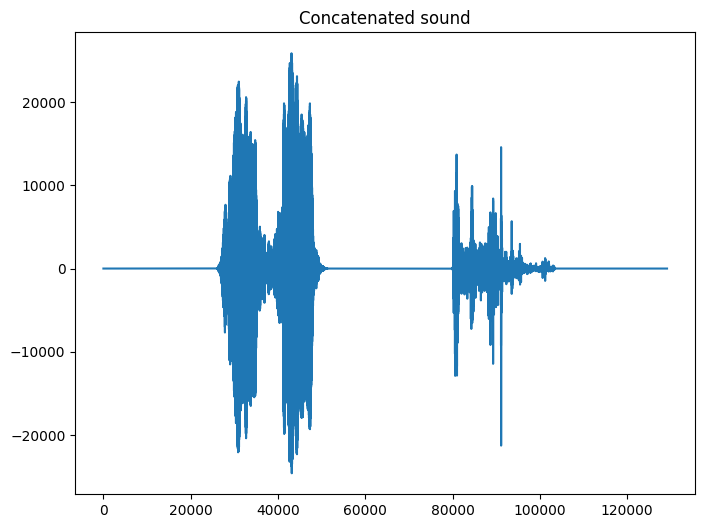

In [9]:
# Make new sound
sound_concatenated = np.concatenate((silence, sound_bird, silence, sound_leaves_amp_cut, silence))

# Plot and play result
plt.figure(figsize=(8,6))
plt.plot(sound_concatenated)
plt.title("Concatenated sound")
plt.show()

How to do for "concatenating" on the other axis ??

<h3 style="text-align:left;">Exercise 2 - Image data<span style="float: right">7 points</span></h3>

In this exercise, you'll work with an image, i.e. an n-dimensional matrix data. First, we load and plot the image:

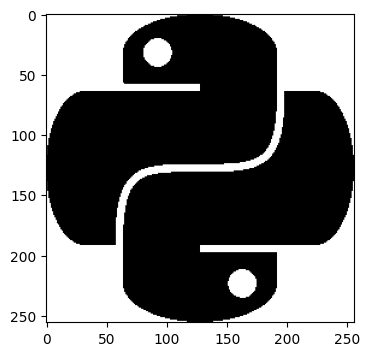

In [10]:
import matplotlib.pyplot as plt
import numpy as np

im = plt.imread('./data/python.bmp')
im = np.array(im)

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

The image is a 3-dimensional array, where the 1st and 2nd dimensions represent positions on the Y (rows) and X (columns) axes and the 3rd saturation values between 0 and 255 for that specific position, as [red, green, blue].

1. Set the pixels on the 50th to 60th row and and 200th to 210th column to green, and displays the resultant image. The data-type of the array should be an 8-bit unsigned integer. (*1 point*)

**NB!** 
- From the 50th row, up to and including the 60th; From the 200th column, up to and including the 210th.
- Keep in mind that the first dimension is related to the usual Y axis, and the second dimension to the usual X axis.

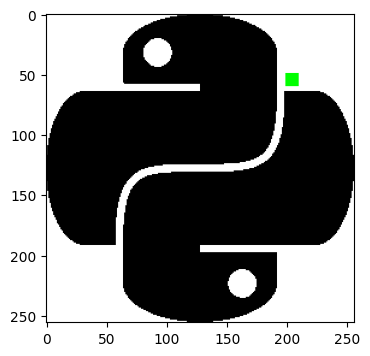

In [11]:
# Set pixels to green -> green is [0, 255, 0]
im[49:60, 199:210] = np.array([0, 255, 0], dtype=np.uint8)

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

2. The image created in point 1 will be the one you use in the rest of the exercise. Make a copy of the top half of the image, flip it along the 2nd axis using the appropriate numpy method, and plot the result. (*1 point*)

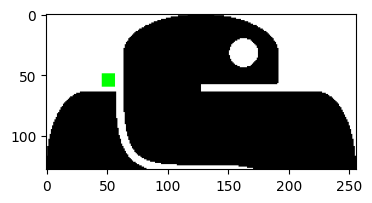

In [12]:
# First, make a copy of the upper half
im_top = im[:im.shape[1] // 2].copy()

# Then flip
im_top_flip = np.flip(im_top, axis=1)

plt.figure(figsize=(4, 4))
plt.imshow(im_top_flip)
plt.show()

3. Make a copy of the bottom half of your image, combine it together with the first half you flipped in point 2, and display the result. Also plot your original image and check whether it has changed. (*1 point*)

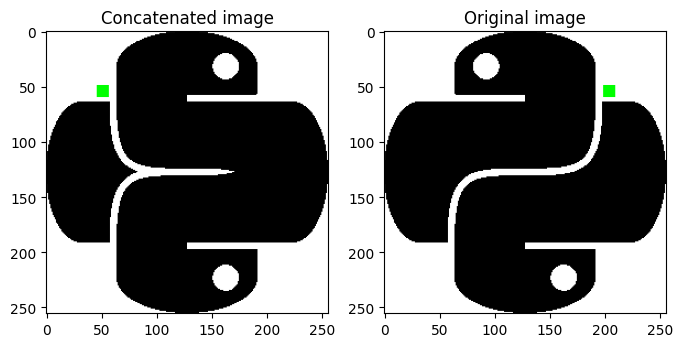

In [13]:
# Create bottom copy and concatenate it with top part
im_bottom = im[im.shape[1] // 2:].copy()
im_concat = np.concatenate([im_top_flip, im_bottom])

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1) 
plt.imshow(im_concat)
plt.title('Concatenated image')
plt.subplot(1, 2, 2) 
plt.imshow(im)
plt.title('Original image')

plt.show()

4. Make a shallow copy (view) of the top half of your image. Change every black pixel ([0, 0, 0]) to a green pixel ([0, 255, 0]). Plot the resulting colored top part, together with the base of your shallow copy and also the original image. (*2 points*)

**Hint**: to test that a consition holds for multiple elements use the *numpy.all* function.

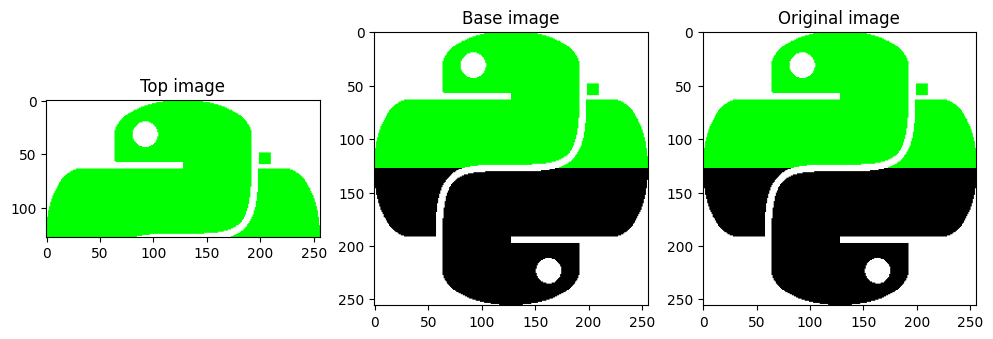

In [14]:
# First, create a view of the top image
im_top = im[:im.shape[1] // 2].view()

# Then, select the black pixels
mask_black = np.all(im_top[:, :] == [0, 0, 0], axis=2)
im_top[mask_black] = [0, 255, 0]

# Another way to select indexes ?

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1) 
plt.imshow(im_top)
plt.title('Top image')
plt.subplot(1, 3, 2) 
plt.imshow(im_top.base)
plt.title('Base image')
plt.subplot(1, 3, 3) 
plt.imshow(im)
plt.title('Original image')

plt.show()

In [15]:

# idx_black = np.where(np.all(im_top == [0, 0, 0], axis=-1))
# im_top[idx_black] = [0, 255, 0]

5. In point 3, your original image should not have changed, while in point 4, the original image should show the same change as when plotting the base of your shallow copy. Give a brief explanation of why the original image changed in one instance, and not in the other. (*2 points*)

In [16]:
###
# YOUR ANSWER HERE
###

<h3 style="text-align:left;">Exercise 3 - Tabular data<span style="float: right">3 points</span></h3>

In the following you'll work with tabular data, i.e. data related to multiple observations. The dataset consists of synthetic data on monthly average precipitations in 4 different countries: Switzerland, Italy, France and Germany. Let's first load the dataset and assign the variables:

In [17]:
import numpy as np

precip = np.load("./data/precip.npy", allow_pickle=True)

precip[:, 0]  # 12 data points for Switzerland (one per month)
precip[:, 1]  # 12 data points for Italy (one per month)
precip[:, 2]  # 12 data points for France (one per month)
precip[:, 3]  # 12 data points for Germany (one per month)

array([1.19, 1.23, 2.37, 3.37, 3.55, 2.5 , 2.36, 2.17, 2.38, 1.78, 1.79,
       1.24])

1. Use built-in numpy methods to obtain an array with the maximum precipitation for each country, and the average precipitation *across* the five countries for each month. (*1 point*)

In [18]:
max_precip = np.max(precip, axis=0)
print("Max precipitation for each country: ", max_precip)

avg_precip = np.mean(precip, axis=1)
print("Average precipitation for each month: ", avg_precip)

Max precipitation for each country:  [3.05 2.56 2.89 3.55]
Average precipitation for each month:  [0.7    0.745  1.855  2.8875 2.99   1.965  1.905  1.64   1.85   1.3
 1.3775 0.82  ]


2. Obtain the maximum precipitation of the entire dataset. Next, use a numpy method to find out at which row and column in the dataset you would find this maximum precipitation at. (*2 points*)

In [19]:
max_precip_all = np.max(precip)
print(max_precip_all)

# Solution 1
idx_max = np.where(precip == max_precip_all)
print(idx_max)

# Solution 2 -> why 19 ??
idx_max = np.argmax(precip)
print(idx_max)

3.55
(array([4], dtype=int64), array([3], dtype=int64))
19


why 19 ??

In [20]:

print(19 // 4, 19 % 4)

4 3


## Indexing Arrays

Python is a "0-index" language, meaning that array elements and dimensions start from 0, rather than 1 (e.g. as R, Matlab) and finish at (N-1), if we want N elements.

In [21]:
list(range(5))

[0, 1, 2, 3, 4]

In [22]:
import numpy as np

a = np.arange(5)
print(a)

[0 1 2 3 4]


In [23]:
# Take first element
print(a[0])

# , or
print(a[0:1])

0
[0]


Are the results equal? Why?

In [24]:

print(a[0].shape)
print(a[0:1].shape)

()
(1,)


In [25]:
# Take second and third element
print(a[[1,2]])

print(a[1:3])

[1 2]
[1 2]


In [26]:
# Take last 3 elements
print(a[-3:])

print(a[2:])

[2 3 4]
[2 3 4]


Also array dimensions are 0-indexed:

In [27]:
matrix = np.random.rand(5, 4, 3)
print(matrix.shape)
matrix

(5, 4, 3)


array([[[0.16361332, 0.87453667, 0.55619402],
        [0.34701089, 0.07648018, 0.6690825 ],
        [0.2588392 , 0.07066431, 0.53924887],
        [0.33971494, 0.29298645, 0.93836256]],

       [[0.67465741, 0.84515403, 0.31537692],
        [0.84470205, 0.90568967, 0.80772584],
        [0.58498853, 0.1411573 , 0.10404124],
        [0.76253493, 0.67947221, 0.68234081]],

       [[0.6134471 , 0.5612447 , 0.88865269],
        [0.94429874, 0.02032818, 0.1282601 ],
        [0.1498182 , 0.26542473, 0.53364224],
        [0.25235213, 0.69990889, 0.3939877 ]],

       [[0.08983635, 0.85011339, 0.88847352],
        [0.48784649, 0.53003229, 0.44713761],
        [0.22929666, 0.94108239, 0.02403341],
        [0.03637673, 0.83807839, 0.88517531]],

       [[0.1145631 , 0.35365758, 0.99485507],
        [0.03741446, 0.88733935, 0.27369051],
        [0.19058861, 0.94241183, 0.6964332 ],
        [0.49536293, 0.10771032, 0.12516545]]])

In [28]:
np.random.rand(5) * 20 - 10

array([ 1.33900173,  3.43683423,  3.31725731, -2.18855231,  9.59428576])

Each element in a dimension is a matrix with the other dimensions:

In [29]:
print(matrix[0].shape)
print(matrix[:, 0].shape)
print(matrix[:, :, 0].shape)

(4, 3)
(5, 3)
(5, 4)


With aggregative functions:

In [30]:
print(np.mean(matrix, axis=0).shape)
print(np.mean(matrix, axis=1).shape)
print(np.mean(matrix, axis=2).shape)

(4, 3)
(5, 3)
(5, 4)


When testing for a condition of all elements along an axis:

In [31]:
matrix[0, 0]

array([0.16361332, 0.87453667, 0.55619402])

In [32]:
# change first element of matrix (view)
matrix[0, 0] = [1, 1, 1]

print(matrix)

[[[1.         1.         1.        ]
  [0.34701089 0.07648018 0.6690825 ]
  [0.2588392  0.07066431 0.53924887]
  [0.33971494 0.29298645 0.93836256]]

 [[0.67465741 0.84515403 0.31537692]
  [0.84470205 0.90568967 0.80772584]
  [0.58498853 0.1411573  0.10404124]
  [0.76253493 0.67947221 0.68234081]]

 [[0.6134471  0.5612447  0.88865269]
  [0.94429874 0.02032818 0.1282601 ]
  [0.1498182  0.26542473 0.53364224]
  [0.25235213 0.69990889 0.3939877 ]]

 [[0.08983635 0.85011339 0.88847352]
  [0.48784649 0.53003229 0.44713761]
  [0.22929666 0.94108239 0.02403341]
  [0.03637673 0.83807839 0.88517531]]

 [[0.1145631  0.35365758 0.99485507]
  [0.03741446 0.88733935 0.27369051]
  [0.19058861 0.94241183 0.6964332 ]
  [0.49536293 0.10771032 0.12516545]]]


In [33]:
# Check if an entire element is equal to an array
np.all(matrix == [1, 1, 1], axis=2)  # or axis=-1

array([[ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

Looping through arrays (starts from 1st dimension):

In [34]:
for elem in matrix:
    print(elem.shape)

(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)


Strides:

In [35]:
matrix[1:2, 3:4].shape

(1, 1, 3)

In [36]:
matrix[1:4:2].shape

(2, 4, 3)

In [37]:
np.array_equal(matrix[1:4:2], matrix[[1, 3]])

True

In [38]:
matrix[:-1, ::2, [0, 1]].shape

(4, 2, 2)

Reshaping of arrays:

In [39]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [40]:
X[2,[2,0,1]].shape

(3,)

### Pay attention when numpy performs operations separately on each axis!

Example with sort:

In [41]:
m = np.empty((10, 3))
m[:, 0] = np.arange(10)
m[:, 1] = np.arange(10)[::-1]  # reverse order
m[:, 2] = np.arange(10, 20)[::-1]

print(m)

[[ 0.  9. 19.]
 [ 1.  8. 18.]
 [ 2.  7. 17.]
 [ 3.  6. 16.]
 [ 4.  5. 15.]
 [ 5.  4. 14.]
 [ 6.  3. 13.]
 [ 7.  2. 12.]
 [ 8.  1. 11.]
 [ 9.  0. 10.]]


In [42]:
np.sort(m, axis=0)  # sort along columns

array([[ 0.,  0., 10.],
       [ 1.,  1., 11.],
       [ 2.,  2., 12.],
       [ 3.,  3., 13.],
       [ 4.,  4., 14.],
       [ 5.,  5., 15.],
       [ 6.,  6., 16.],
       [ 7.,  7., 17.],
       [ 8.,  8., 18.],
       [ 9.,  9., 19.]])

Every row is separately sorted! What if we want to keep the same linked, e.g. by sorting only the second column?

In [43]:

idx_sort = np.argsort(m[:, 1])
m[idx_sort]

array([[ 9.,  0., 10.],
       [ 8.,  1., 11.],
       [ 7.,  2., 12.],
       [ 6.,  3., 13.],
       [ 5.,  4., 14.],
       [ 4.,  5., 15.],
       [ 3.,  6., 16.],
       [ 2.,  7., 17.],
       [ 1.,  8., 18.],
       [ 0.,  9., 19.]])

In [44]:
idx_sort

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0], dtype=int64)

### Indexing with booleans

In [45]:
arr1 = np.arange(10)
arr2 = np.arange(100, 110)

cond = arr2 < 105
print(cond)

[ True  True  True  True  True False False False False False]


In [46]:
print(arr1[cond])

[0 1 2 3 4]


## Broadcasting

### Operations with broadcasting

Broadcasting occurs when arrays of different shapes are used in a binary operation (or an operation involving more than one array).

Rules of broadcasting:

1. If the two arrays differ in dimensions: the shape of the one with fewer dimensions is padded with ones on the leading (left) side

2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 is stretched to match the other shape

3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised

In [47]:
# Example: how do the following vectors get broadcasted?

a = np.array([10, 20, 30, 40])
a + 5

array([15, 25, 35, 45])

In [48]:
b = np.array([1, 2, 3, 4, 5])
a + b

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

Three ways of performing the operation in a matrix form:

In [ ]:
# 1)
result = np.empty((5, 4), dtype=int)
for row, valb in enumerate(b):
    for col, vala in enumerate(a):
        result[row, col] = vala + valb
result

array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [ ]:
# 2)
aa = np.tile(a, (5, 1))
print(aa)
# Turn b into a column array, then tile it
bb = np.tile(b.reshape(-1, 1), (1, 4))
print(bb)
aa + bb

[[10 20 30 40]
 [10 20 30 40]
 [10 20 30 40]
 [10 20 30 40]
 [10 20 30 40]]
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]]


array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [ ]:
# 3)
a + b.reshape(-1, 1)

array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])